In [57]:
!pip3 install pandas scikit-learn matplotlib streamlit


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import matplotlib
import seaborn
import streamlit

In [8]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
print(df.info())
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

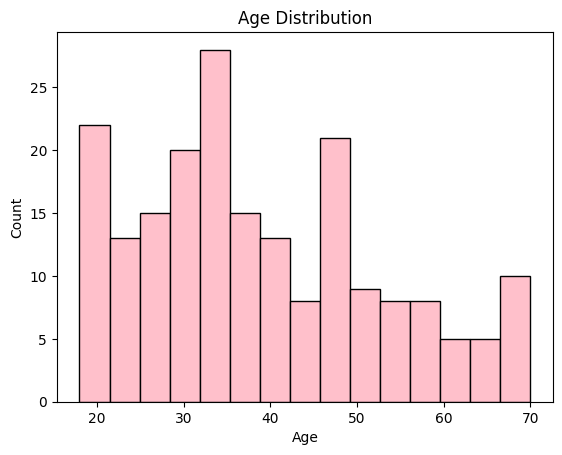

In [14]:
plt.hist(df["Age"], bins=15, edgecolor='black', color = 'pink')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

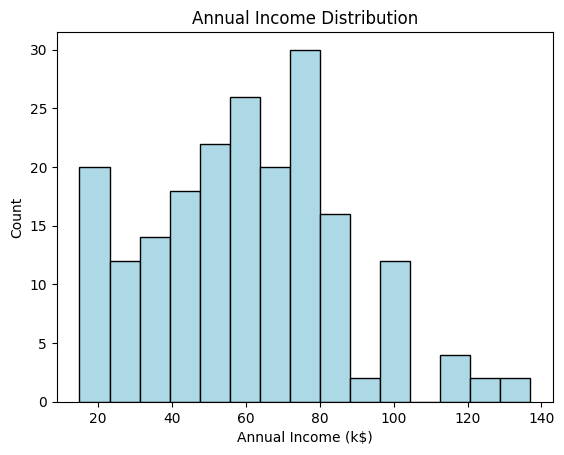

In [46]:
plt.hist(df["Annual Income (k$)"], bins=15, edgecolor='black', color = 'lightblue')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()

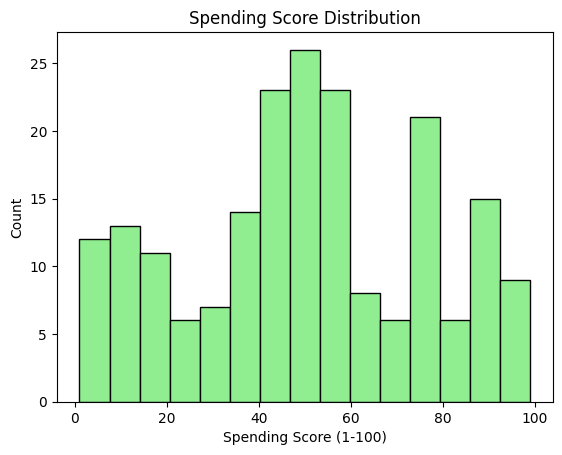

In [25]:
plt.hist(df["Spending Score (1-100)"], bins=15, edgecolor='black', color = 'lightgreen')
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Count")
plt.show()

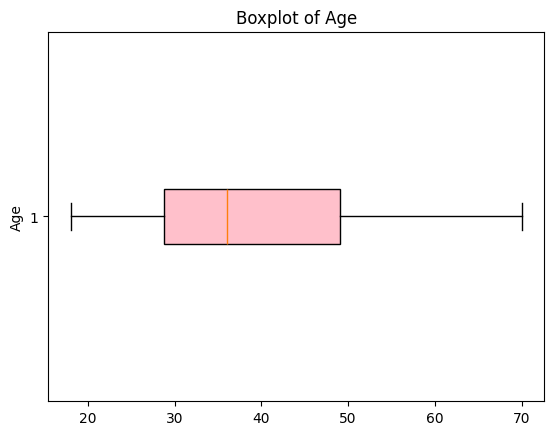

In [39]:
#Age
plt.boxplot(df["Age"], vert=False, patch_artist=True, boxprops=dict(facecolor='pink'))
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()

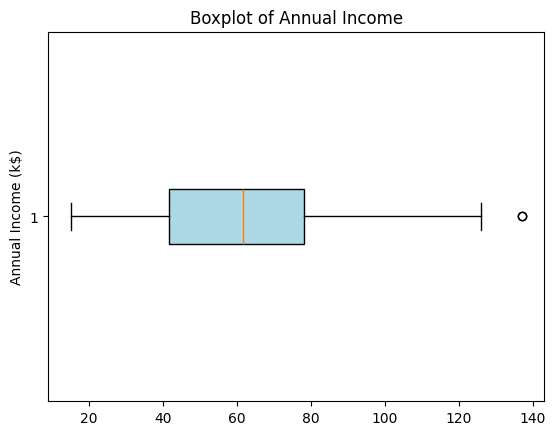

In [45]:
#Annual Income
plt.boxplot(df["Annual Income (k$)"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Annual Income")
plt.ylabel("Annual Income (k$)")
plt.show()

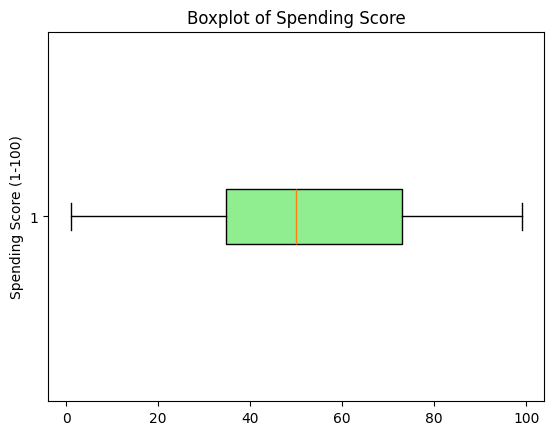

In [42]:
#Spending Score
plt.boxplot(df["Spending Score (1-100)"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot of Spending Score")
plt.ylabel("Spending Score (1-100)")
plt.show()

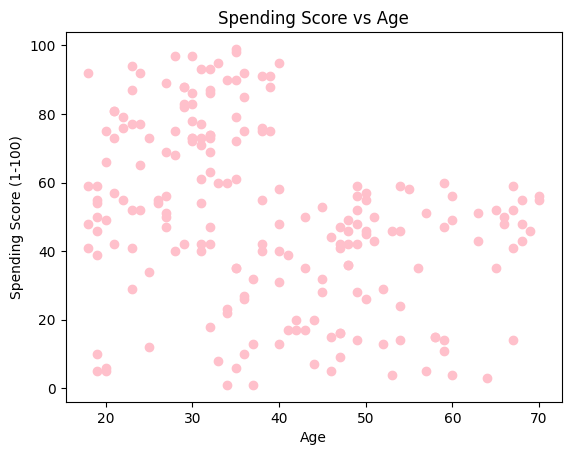

In [47]:
# Scatter plot of Spending Score vs Age
plt .scatter(df["Age"], df["Spending Score (1-100)"], color="pink")
plt.title("Spending Score vs Age")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

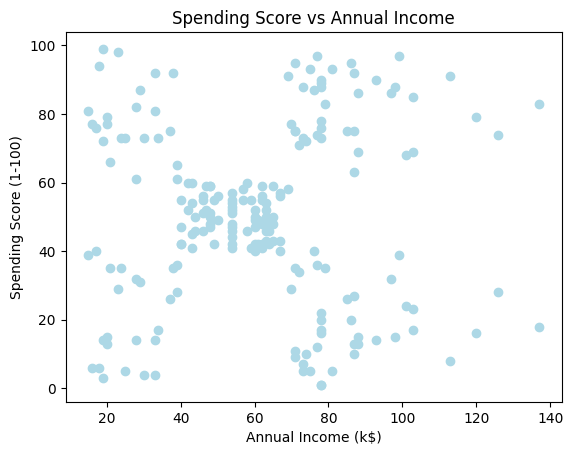

In [48]:
# Scatter plot of Spending Score vs Income
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], color="lightblue")
plt.title("Spending Score vs Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

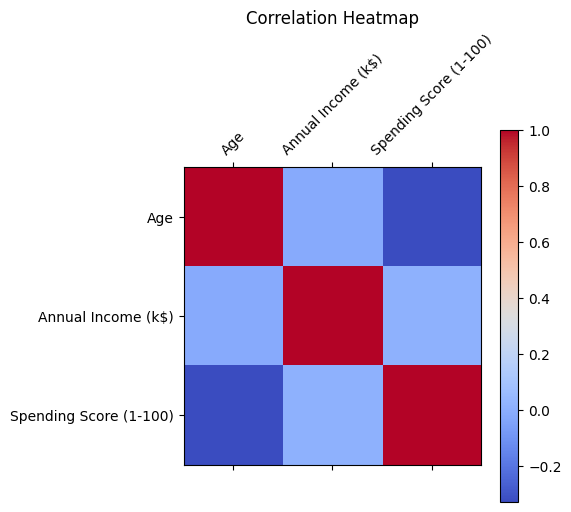

In [53]:
#Correlation heatmap 
corr = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr()

plt.matshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(3), ["Age", "Income", "Spending"], rotation=45)
plt.yticks(range(3), ["Age", "Income", "Spending"])
plt.title("Correlation Heatmap")

# Set axis ticks and labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [51]:
# Drop CustomerID (not useful for clustering) 
# Ignore Genre (categorical, not used in this simple K-Means example)
df_clean = df.drop(columns=["CustomerID", "Genre"])

# Select features for clustering
X = df_clean[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]


In [56]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preview first 5 scaled rows
print(X_scaled[:5])


[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


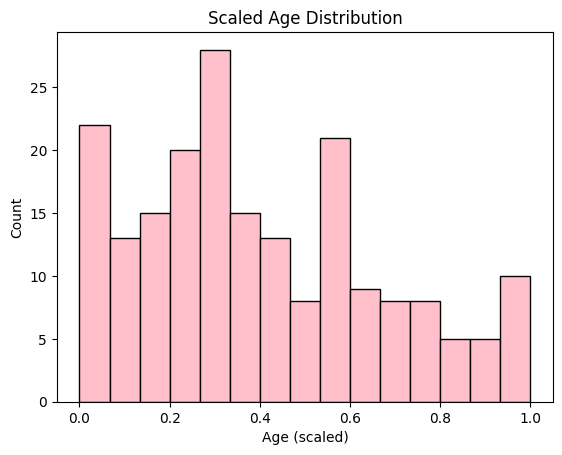

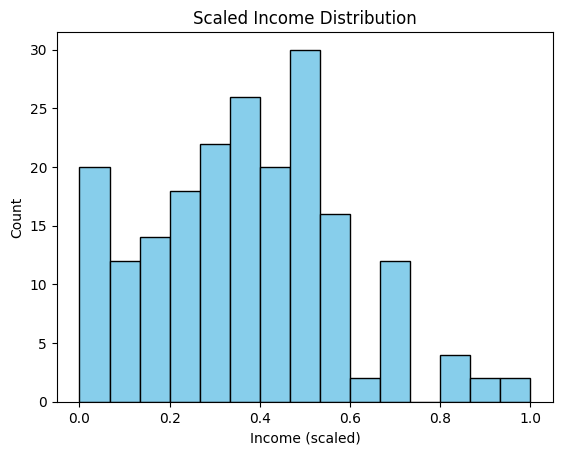

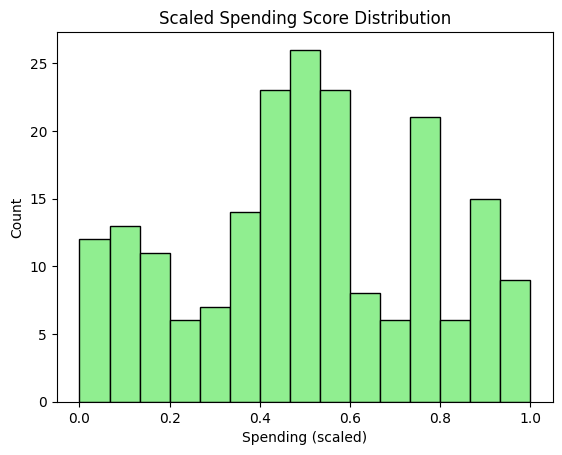

In [59]:
# Age (scaled)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]),
                         columns=["Age", "Income", "Spending"])
plt.hist(scaled_df["Age"], bins=15, color="pink", edgecolor="black")
plt.title("Scaled Age Distribution")
plt.xlabel("Age (scaled)")
plt.ylabel("Count")
plt.show()

# Income (scaled)
plt.hist(scaled_df["Income"], bins=15, color="skyblue", edgecolor="black")
plt.title("Scaled Income Distribution")
plt.xlabel("Income (scaled)")
plt.ylabel("Count")
plt.show()

# Spending (scaled)
plt.hist(scaled_df["Spending"], bins=15, color="lightgreen", edgecolor="black")
plt.title("Scaled Spending Score Distribution")
plt.xlabel("Spending (scaled)")
plt.ylabel("Count")
plt.show()


In [ ]:
### Elbow Method
from sklearn.cluster import KMeans

inertias = []
K = range(2, 11)  # test k values from 2 to 10

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow Method")
plt.show() 